# Chargement des données

Placer toute l'information du fichier dans un tableau numpy à n lignes et 3 colonnes, et confier la dernière colonne à la fonction plot de matplotlib. On peut, comme en TD d'algorithmique et Python, lire les lignes, les découper, convertir en flottants, placer l'information dans une liste de listes puis la convertir en numpy.array. On peut, plus simplement, invoquer numpy.loadtxt.

In [1]:
import numpy as np
FILENAME = 'Processed.3d'
data = np.loadtxt(FILENAME)

# 1. Nuage de points

Afficher le nuage de points des profondeurs. On utilisera en abscisse le numéro de ligne, et en ordonnée la valeur de profondeur du fichier Processed.3d.


Text(0.5, 1.0, 'Données brutes')

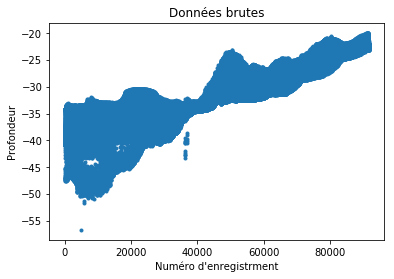

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(data[:,2], '.')
plt.xlabel("Numéro d'enregistrment")
plt.ylabel('Profondeur')
plt.title('Données brutes')

# 2. Boîtes à moustache

Réaliser un affichage synthétique des valeurs de profondeur par des boîtes à moustache :
- avec les paramètres par défaut
- en diminuant la longueur des moustaches
- en modifiant l'aspect des points extérieurs aux moustaches
- en ajoutant la moyenne

On pourra placer les différentes boîtes à moustaches dans autant de subplots :
```
f, ax = plt.subplots(1,4, sharey=True)
```
La variable ax est alors une liste de 4 objets Axes ; on pourra utiliser leur méthode boxplot.

Text(0.5, 0.98, 'Boîtes à moustaches des profondeurs')

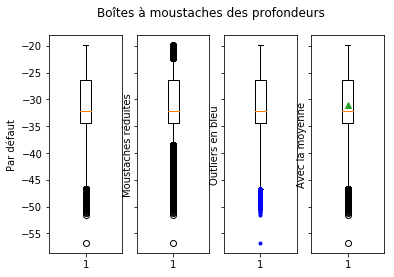

In [3]:
z = data[:, 2]
f, ax = plt.subplots(1, 4, sharey=True)
ax[0].boxplot(z)
ax[0].set_ylabel('Par défaut')
ax[1].boxplot(z, whis=.5)
ax[1].set_ylabel('Moustaches réduites')
ax[2].boxplot(z, sym="b.")
ax[2].set_ylabel('Outliers en bleu')
ax[3].boxplot(z, showmeans=True)
ax[3].set_ylabel('Avec la moyenne')
plt.suptitle('Boîtes à moustaches des profondeurs')

# 3. Courbe cumulative

Tracer la courbe cumulative des données de profondeur.

Il sera utile d'invoquer la méthode sort pour ordonner les valeurs de profondeurs. Cette méthode modifie le tableau : ce n'est pas gênant si son seul usage est de tracer la courbe cumulative, mais peut le devenir si on réutilise la donnée dans les questions ultérieures. Il peut être plus prudent de travailler sur une copie.

Pour les ordonnées, il suffit de générer des nombres linéairement répartis sur \[0,1\].

Text(0.5, 1.0, 'Courbe cumulative')

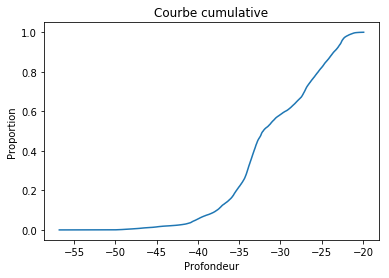

In [4]:
y = np.linspace(0, 1, data.shape[0])
x = np.sort(data[:,2])
plt.plot(x, y)
plt.xlabel('Profondeur')
plt.ylabel('Proportion')
plt.title('Courbe cumulative')

# 4. Histogramme des profondeurs

Tracer des histogrammes des profondeurs :
- avec des classes de largeur constante
- avec des classes d'effectifs constants

On utilisera une valeur de densité plutôt que d'effectifs pour déterminer la hauteur des barres de l'histogramme.

Il convient d'utiliser la courbe cumulative pour déterminer les frontières des classes à fournir à hist pour les classes à effectifs (presque) constants.

Text(0, 0.5, 'Densité')

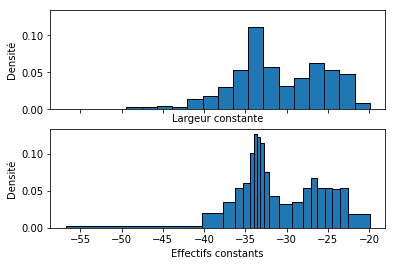

In [5]:
nb = 20
f, ax = plt.subplots(2, 1, sharex=True, sharey=True)

ax[0].hist(data[:,2], bins=nb, density=True, ec='k')
ax[0].set_xlabel('Largeur constante')
ax[0].set_ylabel('Densité')

z = np.sort(data[:,2])
# Construction en 2 temps pour ne pas rater la dernière valeur
b = np.hstack((z[::len(z)//nb][:-1], z[-1]))
ax[1].hist(data[:,2], bins=b, density=True, ec='k')
ax[1].set_xlabel('Effectifs constants')
ax[1].set_ylabel('Densité')

# 5. Découpage par tranches et boîtes à moustaches

Identifier le minimum et le maximum de Easting (colonne n°1, donc la deuxième), et séparer les données de profondeur en n listes, selon la valeur de Easting. On découpera ainsi les classes selon n segments de même longueur sur \[min(Easting), max(Easting)\].

Pour chacune de ces listes, tracer une boîte à moustache. L'exemple suivant reprend les choix du troisième cas de la question 2, mais les autres saveurs de boxplot sont les bienvenues.

Text(0, 0.5, 'Profondeur')

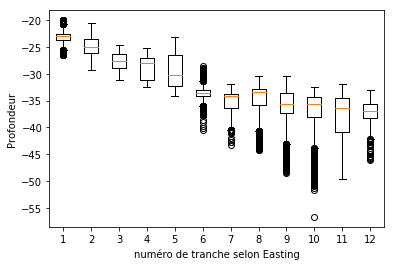

In [6]:
nb = 12
ind = np.argsort(data[:,1])
x = data[ind, 1]
# Calcul des bornes avec cas particulier de la dernière
bornes = [x[0] + i*(x[-1] - x[0])/nb for i in range(nb)] + [x[-1]+1]
z = data[ind, 2]
# Liste des z compris entre la borne i et la borne i+1
lst_z = [z[np.logical_and(x >= bornes[i], x < bornes[i+1])] for i in range(len(bornes) - 1)]
plt.boxplot(lst_z)
plt.xlabel("numéro de tranche selon Easting")
plt.ylabel("Profondeur")

# 6. Découpage par tranches et tracé de quantiles

Découper les données en classes comme à la question précédente.

Tracer, pour chaque classe :
- la médiane
- le premier et le troisième quartiles
- le premier et le dernier quarantiles (frontière des 2.5% les plus bas et des 2.5% les plus hauts)
- la moyenne
- la moyenne moins deux fois l'écart-type, et la moyenne plus deux fois l'écart-type (ce qui correspond aux bornes de l'intervalle de confiance à 95% pour la présence des données)

Si les données étaient distribuées de façon gaussienne, le médiane et la moyenne seraient confondues, de même que le premier quarantile avec la borne basse de l'intervalle, et le dernier quarantile avec la borne haute de l'intervalle.

Pour déterminer les quantiles, il est recommandé de trier les données dans chaque classe.

Pour déterminer la moyenne et l'écart-type, les fonctions mean et std de numpy sont adaptées.

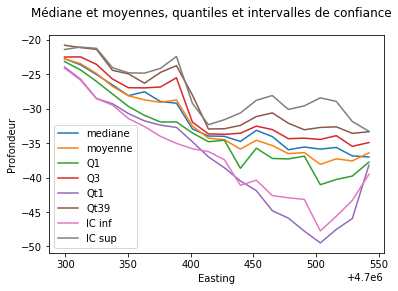

In [7]:
# Dictionnaire des paramètres calculés
fct = {'mediane': np.median, 'moyenne': np.mean,
       'Q1': lambda x: np.percentile(x, 25), 'Q3': lambda x: np.percentile(x, 75),
       'Qt1': lambda x: np.percentile(x, 2.5), 'Qt39': lambda x: np.percentile(x, 97.5),
       'IC inf': lambda x: np.mean(x) - 1.96*np.std(x),
       'IC sup': lambda x: np.mean(x) + 1.96*np.std(x)}
nb = 20  # Nombre de classes
ind = np.argsort(data[:,1])
x = data[ind, 1]
# Calcul des bornes de chaque classe
bornes = np.array([x[0] + i*(x[-1] - x[0])/nb for i in range(nb)] + [x[-1]+1])
x_med = (bornes[1:] + bornes[:-1]) / 2
z = data[ind, 2]
# Découpage des z en classes
lst_z = [z[np.logical_and(x >= bornes[i], x < bornes[i+1])] for i in range(len(bornes) - 1)]
# Tracer une courbe par paramètre
for t in fct.keys():
    plt.plot(x_med, [fct[t](v) for v in lst_z], label=t)
plt.xlabel("Easting")
plt.ylabel("Profondeur")
plt.suptitle("Médiane et moyennes, quantiles et intervalles de confiance")
plt.legend()

# 7. Affichage sur deux dimensions de la quantité de données

On ne s'intéresse ici qu'aux données selon Easting et Northing. Représenter avec hist2d la quantité de données disponibles dans chaque classe, de largeur et de longueur constantes.

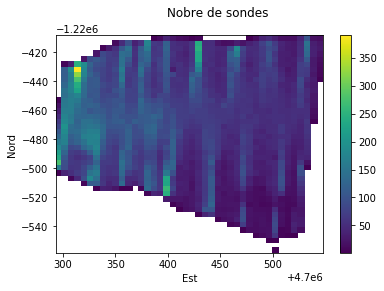

In [8]:
plt.hist2d(data[:,1], data[:,0], bins=42, cmin=1)
plt.xlabel('Est')
plt.ylabel('Nord')
plt.suptitle('Nobre de sondes')
plt.colorbar()

# 8. Courbes de niveau

Tracer les courbes de niveau du terrain observé. Pour cela :

1. Répartir les données de profondeur dans des listes (selon Easting) de listes (selon Northing). On obtient ainsi une liste de listes de listes de profondeur. Comme les listes de profondeurs n'ont pas toutes la même taille, il n'est pas utile d'essayer de faire des tableaux numpy à trois dimensions.
2. Avec meshgrid et linspace, créer un tableau des valeurs des Easting et des Northing au centre de chaque case.
3. Créer un tableau ou une liste de listes pour recevoir les valeurs de  profondeur pour chaque case. Initialiser ces valeurs à NaN (not a number) : float('nan'), math.nan ou numpy.nan
4. Pour chaque case ayant suffisamment de données (au moins 7 pour la figure en exemple), calculer une valeur de profondeur à partir de la liste des profondeurs de la case :
    * Profondeur moyenne
    * Profondeur médiane
5. Tracer les courbes de niveau avec contourf. Il colorie les espaces entre les lignes de niveau, et donc permet de repérer les zones n'ayant pas assez de données, contrairement à contour.

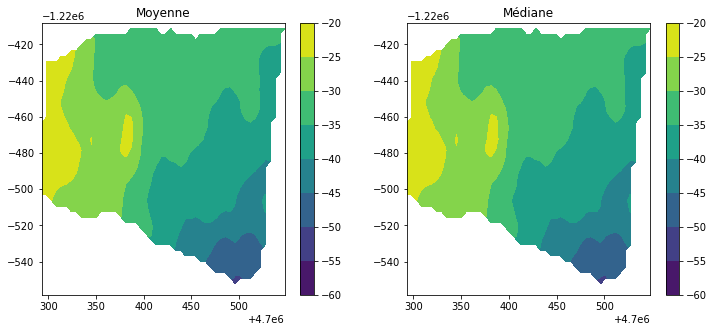

In [9]:
nb = 50
# Création d'une matrice de listes vides
mat = np.empty((nb, nb), dtype=object)
for i in range(nb):
    for j in range(nb):
        mat[i, j] = list()
x0 = np.min(data[:, 1])
xn = np.max(data[:, 1])
dx = (xn - x0) / (nb - 1)
y0 = np.min(data[:, 0])
yn = np.max(data[:, 0])
dy = (yn - y0) / (nb - 1)
for val in data:
    # Pour chaque élémet, calculer son indice dans la matrice de listes
    ix = int((val[1] - x0) / dx)
    iy = int((val[0] - y0) / dy)
    mat[iy, ix].append(val[2])
# Création des matrices pour la moyenne et la médiane
mat_avg = np.full(mat.shape, np.nan)
mat_med = np.full(mat.shape, np.nan)
X, Y = np.meshgrid(np.linspace(x0, xn, nb), np.linspace(y0, yn, nb))
for i in range(nb):
    for j in range(nb):
        if len(mat[i, j]) > 0:
            mat_avg[i, j] = np.average(mat[i, j])
            mat_med[i, j] = np.median(mat[i, j])
f, ax = plt.subplots(1, 2, figsize=(12, 5))
p1 = ax[0].contourf(X, Y, mat_avg)
ax[0].set_title('Moyenne')
f.colorbar(p1, ax=ax[0])
p2 = ax[1].contourf(X, Y, mat_med)
ax[1].set_title('Médiane')
f.colorbar(p2, ax=ax[1])

#  9. Visualisation de la variance
Créer des listes de profondeurs et un meshgrid en Easting et Northing comme à la question 8.

Dans chaque case, calculer l'écart-type :
- écart-type naturel, comme racine de la variance empirique naturelle
- écart-type sans biais, comme racine de la variance empirique sans biais, dans le calcul de laquelle on divise par n-1 au lieu de n.

Afficher les courbes de niveau de cet écart-type, qui peut caractériser les zones de fortes pentes (au centre de la zone), mais aussi de données fortement bruitées (en limite de portée du sonar)

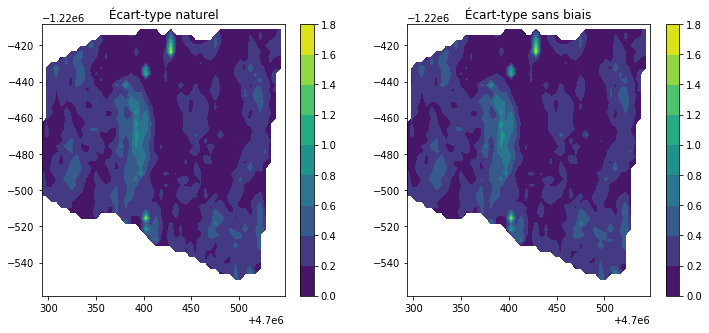

In [10]:
nb = 50
mat = np.empty((nb, nb), dtype=object)
for i in range(nb):
    for j in range(nb):
        mat[i, j] = list()
x0 = np.min(data[:, 1])
xn = np.max(data[:, 1])
dx = (xn - x0) / (nb - 1)
y0 = np.min(data[:, 0])
yn = np.max(data[:, 0])
dy = (yn - y0) / (nb - 1)
for val in data:
    ix = int((val[1] - x0) / dx)
    iy = int((val[0] - y0) / dy)
    mat[iy, ix].append(val[2])
mat_std = np.full(mat.shape, np.nan)
mat_std2 = np.full(mat.shape, np.nan)
X, Y = np.meshgrid(np.linspace(x0, xn, nb), np.linspace(y0, yn, nb))
for i in range(nb):
    for j in range(nb):
        # Calcul de l'écart-type uniquement s'il y a au moins 3 valeurs
        if len(mat[i, j]) > 2:
            mat_std[i, j] = np.std(mat[i, j])
            mat_std2[i, j] = np.std(mat[i, j], ddof=1)
f, ax = plt.subplots(1, 2, figsize=(12,5))
p1 = ax[0].contourf(X, Y, mat_std)
ax[0].set_title('Écart-type naturel')
f.colorbar(p1, ax=ax[0])
p2 = ax[1].contourf(X, Y, mat_std2)
ax[1].set_title('Écart-type sans biais')
f.colorbar(p2, ax=ax[1])

# 10. Tracé de surface en 3d

Utiliser l'information de profondeur moyenne ou médiane de la question 8 pour chaque case (avec les valeurs NaN).

Tracer la surface en 3d avec plot_surface :
- Importer Axes3D :
- from mpl_toolkits.mplot3d import Axes3D
- référencer la figure de matplotlib.pyplot (importé comme plt) et passer le système de coordonnées en 3d :
```
    fig = plt.figure()
    ax = fig.gca(projection='3d')
```
- Le type de ax est alors Axes3DSubplot, et comprend la méthode plot_surface.

Text(0.5, 0, 'Altitude')

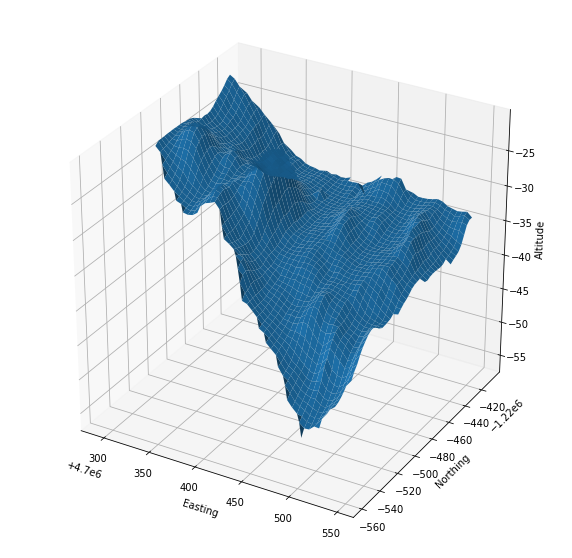

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, mat_avg)
ax.set_xlabel('Easting')
ax.set_ylabel('Northing')
ax.set_zlabel('Altitude')

# 11. Analyse des pentes

Quand il y a suffisamment de données à la fois dans la case \[i, j\] et dans une case voisine, \[i+1, j\] ou \[i, j+1\], on calcule la pente entre le barycentre de la case \[i, j\] et le barycentre de la case voisine. Pour cela, il convient de disposer des valeurs de Easting et de Northing pour chacune des données de la case : quand les données sont peu nombreuses dans une case, elles sont en général proches d'un bord, et placer les coordonnées x et y au centre de la case conduirait à sous-évaluer la pente.

Pour déterminer s'il y a suffisamment de données, on peut :
- tester la longueur des listes de profondeur, et calculer les moyennes lorsque c'est requis
- calculer les moyennes de profondeur comme en question 8, et calculer les pentes lorsque la case ne contient pas NaN (test avec math.isnan)

On crée ainsi une liste de valeurs de pente, dont on peut tracer l'histogramme comme en question 4.

Text(0, 0.5, 'Densité')

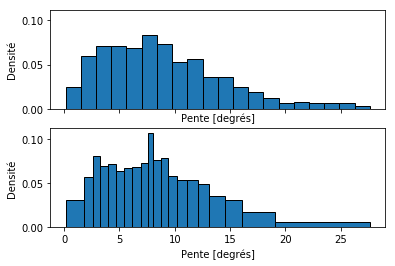

In [12]:
nb = 50
mat = np.empty((nb, nb), dtype=object)
for i in range(nb):
    for j in range(nb):
        mat[i, j] = list()
x0 = np.min(data[:, 1])
xn = np.max(data[:, 1])
dx = (xn - x0) / (nb - 1)
y0 = np.min(data[:, 0])
yn = np.max(data[:, 0])
dy = (yn - y0) / (nb - 1)
for val in data:
    ix = int((val[1] - x0) / dx)
    iy = int((val[0] - y0) / dy)
    mat[iy, ix].append(val[2])
mat_avg = np.full(mat.shape, np.nan)
X, Y = np.meshgrid(np.linspace(x0, xn, nb), np.linspace(y0, yn, nb))
for i in range(nb):
    for j in range(nb):
        # Calcul de la moyenne uniquement si nb val > 5
        if len(mat[i, j]) > 5:
            mat_avg[i, j] = np.average(mat[i, j])
# Pente selon les x
px = (mat_avg[1:-1, 2:] - mat_avg[1:-1, :-2]) / (2 * dx)
# Pente selon les y
py = (mat_avg[2:, 1:-1] - mat_avg[:-2, 1:-1]) / (2 * dy)
# Pente en degrés
pente = np.rad2deg(np.arctan(np.hypot(px, py)))
f, ax = plt.subplots(2, 1, sharex=True, sharey=True)
ax[0].hist(pente[~np.isnan(pente)], bins=20, density=True, ec='k')
ax[0].set_ylabel('Densité')
ax[0].set_xlabel('Pente [degrés]')
z = np.sort(pente[~np.isnan(pente)])
b = np.hstack((z[::len(z)//20][:-1], [z[-1]]))
ax[1].hist(z, bins=b, density=True, ec='k')
ax[1].set_xlabel('Pente [degrés]')
ax[1].set_ylabel('Densité')
